<a href="https://colab.research.google.com/github/salma-halloumi/Deep-Learning/blob/main/DNN%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [15]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Regression on toy data

## Data Collection

In [8]:
# Y= 1.5 X + 0
X = np.array([1,2,3,4,5,6,7,10,15,2,20], dtype=float)
y=np.dot(np.array(1.5),X)
y

array([ 1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 15. , 22.5,  3. , 30. ])

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

##Modeling

###Instance

In [26]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=8,input_shape=[1])) #hidden layer
model.add(keras.layers.Dense(units=1)) #ouput layer

### Hyper params / compile

In [27]:
model.compile(optimizer="adam", loss="mean_squared_error")

### Inspection

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Training

In [29]:
history=model.fit(X_train,y_train, epochs=200, verbose=0)

### Evaluation

In [30]:
#history.history.keys()
losses = history.history['loss']
epochs = history.epoch

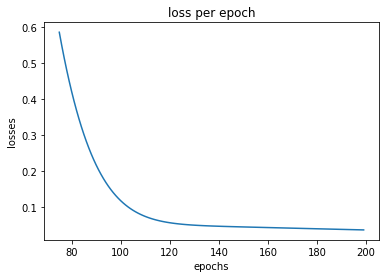

In [33]:
plt.plot(epochs[75:],losses[75:])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss per epoch')
plt.show()

In [34]:
losses[-1]

0.03560083732008934

In [35]:
model.predict([17])

array([[25.325745]], dtype=float32)

In [ ]:
model.save('erg.h5')

#Regression on Real Dataset

In [36]:
import pandas as pd

In [37]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')

In [38]:
print(train.shape,test.shape)

(17000, 9) (3000, 9)


In [39]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [40]:
X_train = train.drop('median_house_value',axis=1)
y_train = train['median_house_value']

X_test = test.drop('median_house_value',axis=1)
y_test = test['median_house_value']

In [41]:
X_train.shape

(17000, 8)

In [42]:
model=keras.Sequential(
    [
     keras.layers.Dense(units=64,input_shape=[X_train.shape[1]]),
     keras.layers.Dense(units=32),
     keras.layers.Dense(units=1)
    ]
)

In [43]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train,y_train,epochs=100,verbose=0)

In [46]:
losses = history.history['loss']
epochs = history.epoch

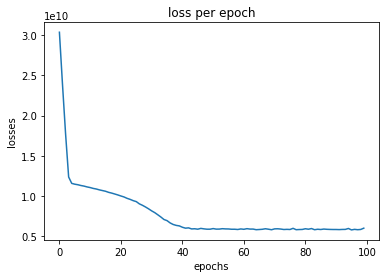

In [47]:
plt.plot(epochs,losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss per epoch')
plt.show()

In [49]:
losses[-1]

5987378688.0

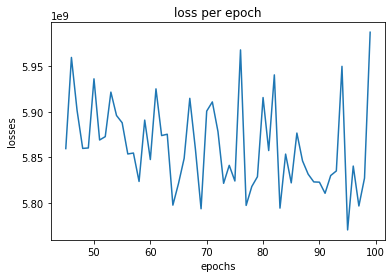

In [48]:
plt.plot(epochs[45:],losses[45:])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss per epoch')
plt.show()

Hyper parameters Tuning

In [62]:
opt= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='mean_squared_error')

In [63]:
history = model.fit(X_train,y_train,epochs=100,verbose=0)

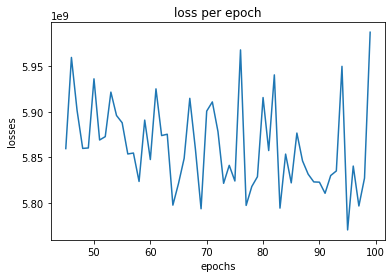

In [64]:
plt.plot(epochs[45:],losses[45:])
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss per epoch')
plt.show()

In [65]:
losses[-1]

5987378688.0

Add Layers\
**Rq :** contrainte de taille du model

In [66]:
model=keras.Sequential(
    [
     keras.layers.Dense(units=64,input_shape=[X_train.shape[1]]),
     keras.layers.Dense(units=32),
     keras.layers.Dense(units=16),
     keras.layers.Dense(units=8),
     keras.layers.Dense(units=1)
    ]
)

In [67]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [69]:
history = model.fit(X_train,y_train,epochs=20,verbose=0)

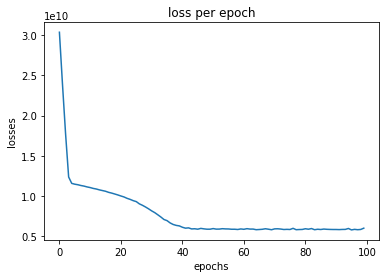

In [70]:
plt.plot(epochs,losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss per epoch')
plt.show()

In [71]:
losses[-1]

5987378688.0